In [320]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [321]:
from PIL import Image, ImageOps


img_pil = Image.open('lena.png')        #to read image
# img_pil.show()    

gray_image = ImageOps.grayscale(img_pil)
# gray_image.show()

gray_img_pil_np = np.array(gray_image)

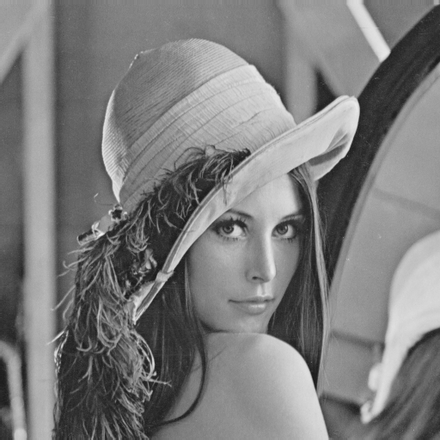

In [322]:
gray_image

Padding Function

In [323]:
def padding(img, mode, kernel_size):
    width, height = img.size
    img_array = np.array(img)
    m = int(np.floor((kernel_size[0] - 1)/2))
    n = int(np.floor((kernel_size[1] - 1)/2))
    new_height = int(height + 2*(m))
    new_width = int(width + 2*(n))
    
    if mode == 'zero':
        zero_padding = np.zeros((new_height, new_width))   
        for i in range(0, width):
            for j in range(0, height):
                zero_padding[j+m, i+n] = img_array[j,i]
                
        padding_image = zero_padding
                
        
    elif mode == 'wrap':
        wrap_padding = np.zeros((new_height, new_width))
        
        for i in range(0, width):
            for j in range(0, height):
                wrap_padding[j+m, i+n] = img_array[j,i]

        wrap_padding[0 : m, : ] = wrap_padding[-1*(2*m) : m + height, : ]
        wrap_padding[-1*m : , : ] =wrap_padding[m : 2*m, :]
        wrap_padding[ : ,-1*(n) : ] = wrap_padding[ : ,n : 2*n]
        wrap_padding[ : ,0 : n] = wrap_padding[ : ,-1*(2*n) : n + width]
            
        padding_image = wrap_padding  
        
    elif mode == 'copy':
        copy_padding = np.zeros((new_height, new_width))
            
        for i in range(0, width):
            for j in range(0, height):
                copy_padding[j+m, i+n] = img_array[j,i]
      

        copy_padding[0 : m, : ] = copy_padding[[m], : ]
        copy_padding[-1*(m) : , : ] = copy_padding[[-1*m-1], :]
        copy_padding[ : ,-1*n : ] = copy_padding[ : ,[-1*n-1]]
        copy_padding[ : ,0 : n] = copy_padding[ : ,[n]]

        padding_image = copy_padding

        
    elif mode == 'reflect':
        reflect_padding = np.zeros((new_height, new_width))  
        print(reflect_padding.shape)
        
        for i in range(0, width):
            for j in range(0, height):
                reflect_padding[j+m, i+n] = img_array[j,i]
                

        reflect_padding[0 : m, : ] = np.flip(reflect_padding[m : 2*m, :],axis = 0)
        reflect_padding[-1*(m) : , : ] = np.flip(reflect_padding[-2*(m) : -1*(m), : ], axis = 0)
        reflect_padding[ : ,-1*(n) : ] = np.flip(reflect_padding[ : ,-2*(n) : -1*(n)], axis = 1)
        reflect_padding[ : ,0 : n] = np.flip(reflect_padding[ : ,n : 2* n], axis = 1)
            
        padding_image = reflect_padding
    return padding_image

Padding Output

In [324]:
#Zero Padding
kernel_size = [100,100]
padding_image = padding(gray_image, 'zero', kernel_size)
result = Image.fromarray(padding_image.astype(np.uint8))
result.save('lena_zero_padding.png')

In [325]:
#Wrap Around Padding
kernel_size = [100,100]
padding_image = padding(gray_image, 'wrap', kernel_size)
result = Image.fromarray(padding_image.astype(np.uint8))
result.save('lena_wrap_padding.png')

In [326]:
#Copy Edge Padding
kernel_size = [100,100]
padding_image = padding(gray_image, 'copy', kernel_size)
result = Image.fromarray(padding_image.astype(np.uint8))
result.save('lena_copy_padding.png')

In [327]:
#Reflect Across Padding
kernel = [100,100]
padding_image = padding(gray_image, 'reflect', kernel)
result = Image.fromarray(padding_image.astype(np.uint8))
result
result.save('lena_reflect_padding.png')

(538, 538)


In [328]:
r, g, b = img_pil.split()
r_np = np.array(r)
g_np = np.array(g)
b_np = np.array(b)


(538, 538)
(538, 538)
(538, 538)


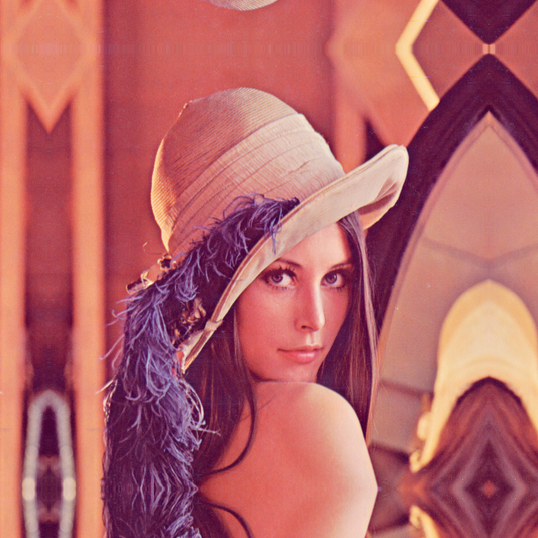

In [329]:
#Reflect Across Padding for color splitted image
kernel = [100,100]
padding_image_r = padding(r, 'reflect', kernel)
padding_image_g = padding(g, 'reflect', kernel)
padding_image_b = padding(b, 'reflect', kernel)
r1 = Image.fromarray(padding_image_r.astype(np.uint8))
g1 = Image.fromarray(padding_image_g.astype(np.uint8))
b1 = Image.fromarray(padding_image_b.astype(np.uint8))
result = Image.merge('RGB', (r1, g1, b1))
result.save('lena_reflect_color_padding.png')
result

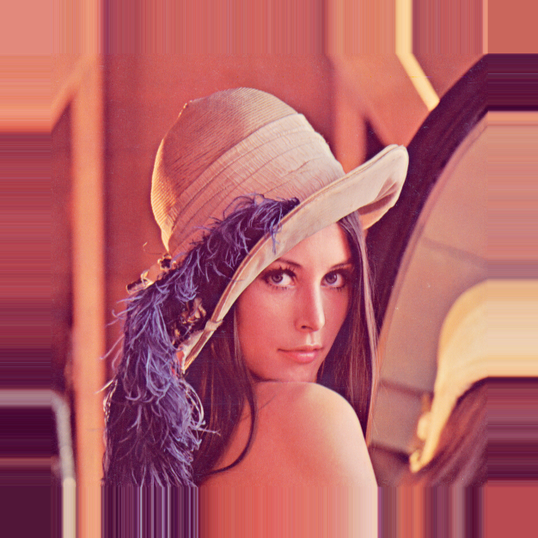

In [330]:
#copy edge Padding for color splitted image
kernel = [100,100]
padding_image_r = padding(r, 'copy', kernel)
padding_image_g = padding(g, 'copy', kernel)
padding_image_b = padding(b, 'copy', kernel)
r1 = Image.fromarray(padding_image_r.astype(np.uint8))
g1 = Image.fromarray(padding_image_g.astype(np.uint8))
b1 = Image.fromarray(padding_image_b.astype(np.uint8))
result = Image.merge('RGB', (r1, g1, b1))
result.save('lena_copy_color_padding.png')
result

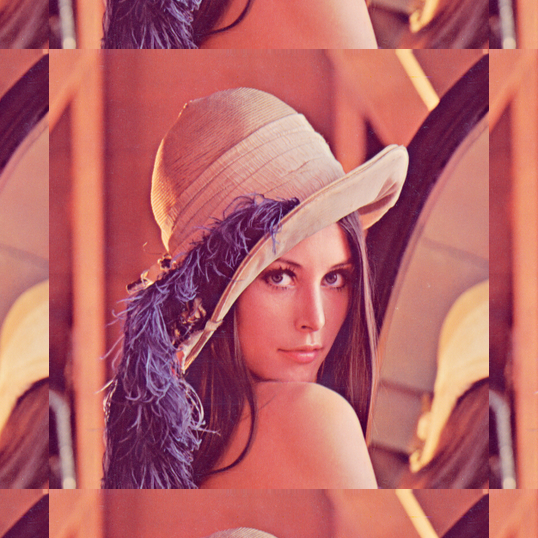

In [331]:
#wrap around Padding for color splitted image
kernel = [100,100]
padding_image_r = padding(r, 'wrap', kernel)
padding_image_g = padding(g, 'wrap', kernel)
padding_image_b = padding(b, 'wrap', kernel)
r1 = Image.fromarray(padding_image_r.astype(np.uint8))
g1 = Image.fromarray(padding_image_g.astype(np.uint8))
b1 = Image.fromarray(padding_image_b.astype(np.uint8))
result = Image.merge('RGB', (r1, g1, b1))
result.save('lena_wrap_color_padding.png')
result

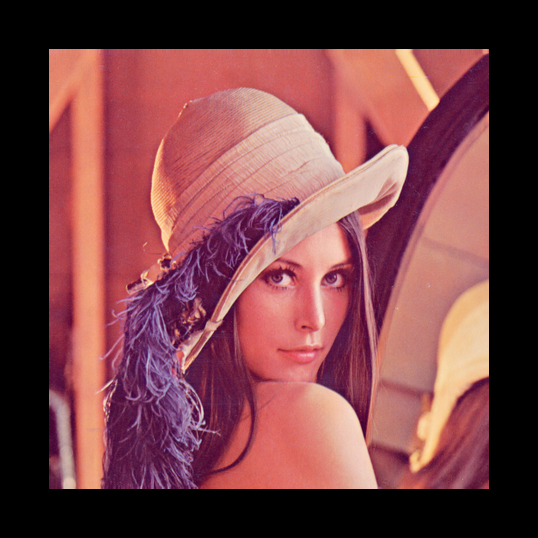

In [332]:
#zero Padding for color splitted image
kernel = [100,100]
padding_image_r = padding(r, 'zero', kernel)
padding_image_g = padding(g, 'zero', kernel)
padding_image_b = padding(b, 'zero', kernel)
r1 = Image.fromarray(padding_image_r.astype(np.uint8))
g1 = Image.fromarray(padding_image_g.astype(np.uint8))
b1 = Image.fromarray(padding_image_b.astype(np.uint8))
result = Image.merge('RGB', (r1, g1, b1))
result.save('lena_zero_color_padding.png')
result

In [333]:
#convolution

def conv2(image, kernel, pad_mode):
    
    if kernel == 'box':
        w = 1/9*np.ones((3,3))
    elif kernel == 'first order derivative row':
        w = np.array([[-1,1,0], [0, 0, 0], [0, 0, 0]])   #[-1, 1]
    elif kernel == 'first order derivative column':
        w = np.array([[-1, 0, 0], [1, 0, 0], [0, 0, 0]])  #[[-1], [1]]
    elif kernel == 'prewitt mx':
        w = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    elif kernel == 'prewitt my':
        w = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    elif kernel == 'sobel mx':
        w = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    elif kernel == 'sobel my':
        w = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    elif kernel == 'robert mx':
        w = np.array([[0,1, 0],[-1,0, 0], [0, 0, 0]])   #[[0,1],[-1,0]]
    elif kernel == 'robert my':
        w = np.array([[1,0, 0],[0,-1, 0], [0, 0, 0]])     #[[1,0],[0,-1]]
        
    
    padded_image = padding(image, pad_mode, w.shape)
    
    conv_image = np.zeros((image.size[0], image.size[1]))       #for stride 1
    
    for i in range(0, image.size[0]):
        for j in range(0, image.size[1]):
            n_matrix = padded_image[j:j + w.shape[0], i:i + w.shape[1]]

            conv_value = np.sum(np.multiply(n_matrix, w))
            conv_image[i][j] = conv_value
    
    return conv_image.transpose()


(442, 442)
(442, 442)
(442, 442)


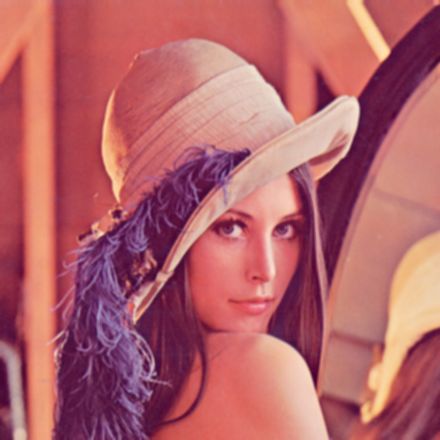

In [334]:
#lena for box filter
conv_image_r = conv2(r, 'box', 'reflect')
conv_image_g = conv2(g, 'box', 'reflect')
conv_image_b = conv2(b, 'box', 'reflect')
r1 = Image.fromarray(cv2.convertScaleAbs(conv_image_r).astype(np.uint8))
g1 = Image.fromarray(cv2.convertScaleAbs(conv_image_g).astype(np.uint8))
b1 = Image.fromarray(cv2.convertScaleAbs(conv_image_b).astype(np.uint8))
result = Image.merge('RGB', (r1, g1, b1))
result.save("lena_box_color.png")
result

(442, 442)
(442, 442)
(442, 442)


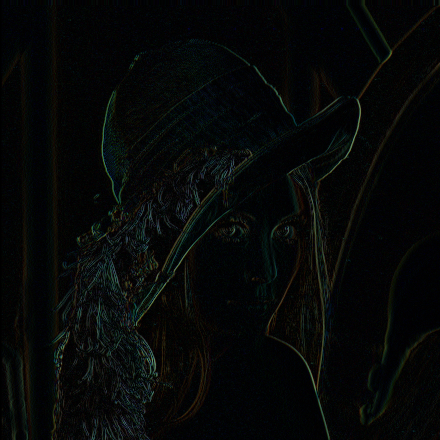

In [335]:
#wolf for first order derivative row
conv_image_r = conv2(r, 'first order derivative row', 'reflect')
conv_image_g = conv2(g, 'first order derivative row', 'reflect')
conv_image_b = conv2(b, 'first order derivative row', 'reflect')
r1 = Image.fromarray(cv2.convertScaleAbs(conv_image_r).astype(np.uint8))
g1 = Image.fromarray(cv2.convertScaleAbs(conv_image_g).astype(np.uint8))
b1 = Image.fromarray(cv2.convertScaleAbs(conv_image_b).astype(np.uint8))
result = Image.merge('RGB', (r1, g1, b1))
result.save("lena_first_derivative_row_color.png")
result

(442, 442)
(442, 442)
(442, 442)


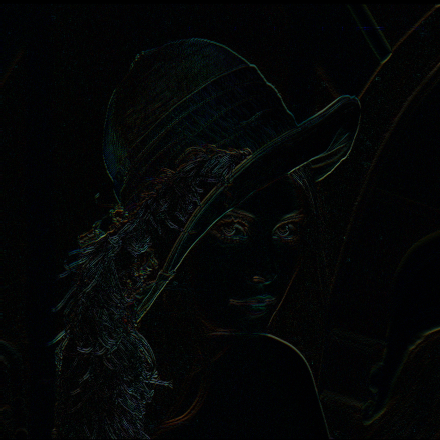

In [336]:
#wolf for first order derivative column
conv_image_r = conv2(r, 'first order derivative column', 'reflect')
conv_image_g = conv2(g, 'first order derivative column', 'reflect')
conv_image_b = conv2(b, 'first order derivative column', 'reflect')
r1 = Image.fromarray(cv2.convertScaleAbs(conv_image_r).astype(np.uint8))
g1 = Image.fromarray(cv2.convertScaleAbs(conv_image_g).astype(np.uint8))
b1 = Image.fromarray(cv2.convertScaleAbs(conv_image_b).astype(np.uint8))
result = Image.merge('RGB', (r1, g1, b1))
result.save("lena_first_derivative_column_color.png")
result


(442, 442)
(442, 442)
(442, 442)


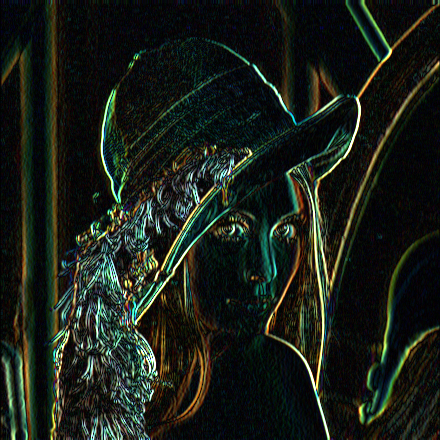

In [337]:
#wolf for prewitt mx
conv_image_r = conv2(r, 'prewitt mx', 'reflect')
conv_image_g = conv2(g, 'prewitt mx', 'reflect')
conv_image_b = conv2(b, 'prewitt mx', 'reflect')
r1 = Image.fromarray(cv2.convertScaleAbs(conv_image_r).astype(np.uint8))
g1 = Image.fromarray(cv2.convertScaleAbs(conv_image_g).astype(np.uint8))
b1 = Image.fromarray(cv2.convertScaleAbs(conv_image_b).astype(np.uint8))
result = Image.merge('RGB', (r1, g1, b1))
result.save("lena_prewitt_mx_color.png")
result

(442, 442)
(442, 442)
(442, 442)


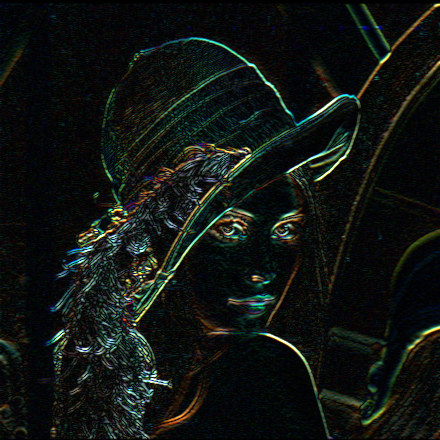

In [338]:
#wolf for prewitt my
conv_image_r = conv2(r, 'prewitt my', 'reflect')
conv_image_g = conv2(g, 'prewitt my', 'reflect')
conv_image_b = conv2(b, 'prewitt my', 'reflect')
r1 = Image.fromarray(cv2.convertScaleAbs(conv_image_r).astype(np.uint8))
g1 = Image.fromarray(cv2.convertScaleAbs(conv_image_g).astype(np.uint8))
b1 = Image.fromarray(cv2.convertScaleAbs(conv_image_b).astype(np.uint8))
result = Image.merge('RGB', (r1, g1, b1))
result.save("lena_prewitt_my_color.png")
result

(442, 442)
(442, 442)
(442, 442)


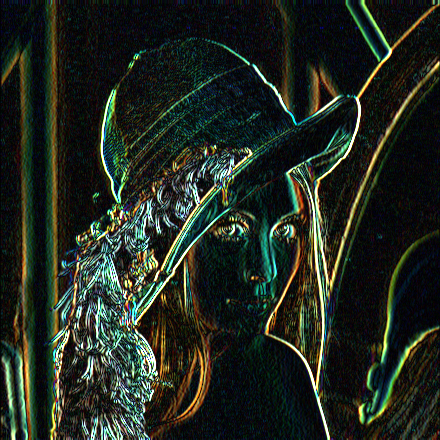

In [339]:
#wolf for sobel mx
conv_image_r = conv2(r, 'sobel mx', 'reflect')
conv_image_g = conv2(g, 'sobel mx', 'reflect')
conv_image_b = conv2(b, 'sobel mx', 'reflect')
r1 = Image.fromarray(cv2.convertScaleAbs(conv_image_r).astype(np.uint8))
g1 = Image.fromarray(cv2.convertScaleAbs(conv_image_g).astype(np.uint8))
b1 = Image.fromarray(cv2.convertScaleAbs(conv_image_b).astype(np.uint8))
result = Image.merge('RGB', (r1, g1, b1))
result.save("lena_sobel_mx_color.png")
result

(442, 442)
(442, 442)
(442, 442)


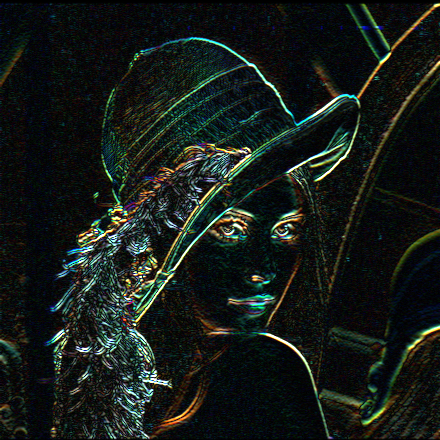

In [340]:
#wolf for sobel my
conv_image_r = conv2(r, 'sobel my', 'reflect')
conv_image_g = conv2(g, 'sobel my', 'reflect')
conv_image_b = conv2(b, 'sobel my', 'reflect')
r1 = Image.fromarray(cv2.convertScaleAbs(conv_image_r).astype(np.uint8))
g1 = Image.fromarray(cv2.convertScaleAbs(conv_image_g).astype(np.uint8))
b1 = Image.fromarray(cv2.convertScaleAbs(conv_image_b).astype(np.uint8))
result = Image.merge('RGB', (r1, g1, b1))
result.save("lena_sobel_my_color.png")
result

(442, 442)
(442, 442)
(442, 442)


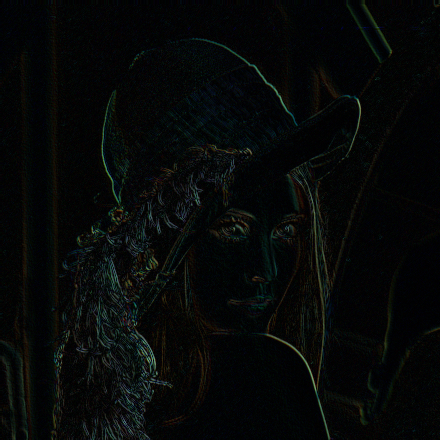

In [341]:
#wolf for robert mx
conv_image_r = conv2(r, 'robert mx', 'reflect')
conv_image_g = conv2(g, 'robert mx', 'reflect')
conv_image_b = conv2(b, 'robert mx', 'reflect')
r1 = Image.fromarray(cv2.convertScaleAbs(conv_image_r).astype(np.uint8))
g1 = Image.fromarray(cv2.convertScaleAbs(conv_image_g).astype(np.uint8))
b1 = Image.fromarray(cv2.convertScaleAbs(conv_image_b).astype(np.uint8))
result = Image.merge('RGB', (r1, g1, b1))
result.save("lena_robert_mx_color.png")
result

(442, 442)
(442, 442)
(442, 442)


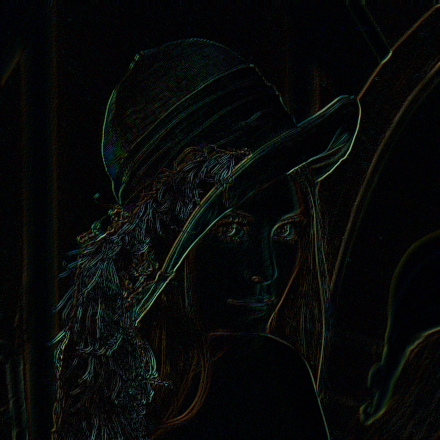

In [342]:
#wolf for robert my
conv_image_r = conv2(r, 'robert my', 'reflect')
conv_image_g = conv2(g, 'robert my', 'reflect')
conv_image_b = conv2(b, 'robert my', 'reflect')
r1 = Image.fromarray(cv2.convertScaleAbs(conv_image_r).astype(np.uint8))
g1 = Image.fromarray(cv2.convertScaleAbs(conv_image_g).astype(np.uint8))
b1 = Image.fromarray(cv2.convertScaleAbs(conv_image_b).astype(np.uint8))
result = Image.merge('RGB', (r1, g1, b1))
result.save("lena_robert_my_color.png")
result

Gray photos

(442, 442)


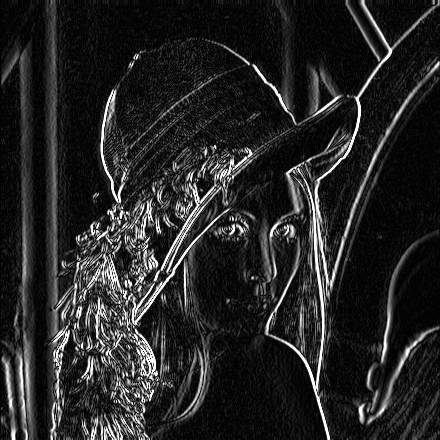

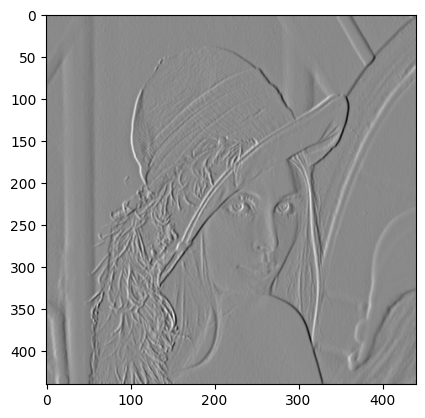

In [343]:
#wolf for sobel mx
conv_image_gray = conv2(gray_image, 'sobel mx', 'reflect')
result = Image.fromarray(cv2.convertScaleAbs(conv_image_gray).astype(np.uint8))
plt.imshow(conv_image_gray, cmap='gray')
result.save("lena_sobel_mx_gray.png")
result

(442, 442)


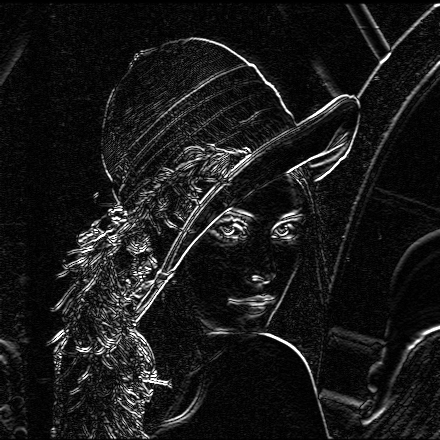

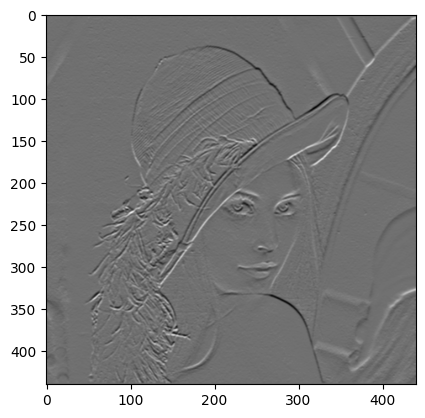

In [344]:
#wolf for sobel my
conv_image_gray = conv2(gray_image, 'sobel my', 'reflect')

result = Image.fromarray(cv2.convertScaleAbs(conv_image_gray).astype(np.uint8))
plt.imshow(conv_image_gray, cmap='gray')
result.save("lena_sobel_my_gray.png")
result

(442, 442)


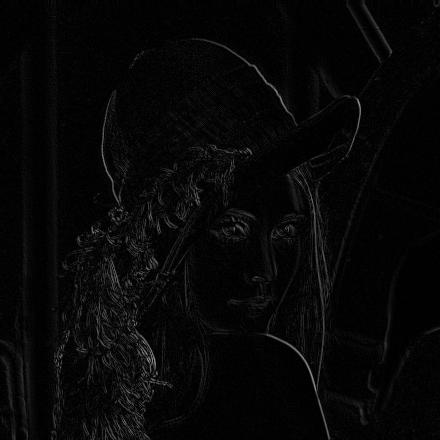

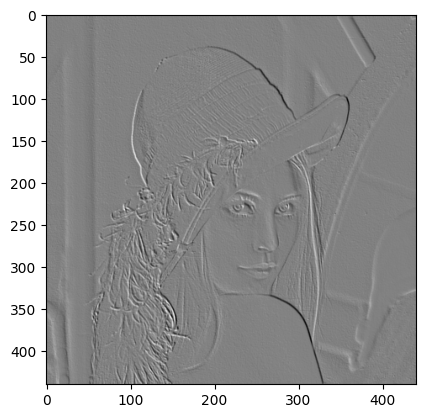

In [345]:
#wolf for robert mx
conv_image_gray = conv2(gray_image, 'robert mx', 'reflect')

result = Image.fromarray(cv2.convertScaleAbs(conv_image_gray).astype(np.uint8))
plt.imshow(conv_image_gray, cmap='gray')
result.save("lena_robert_mx_gray.png")
result

(442, 442)


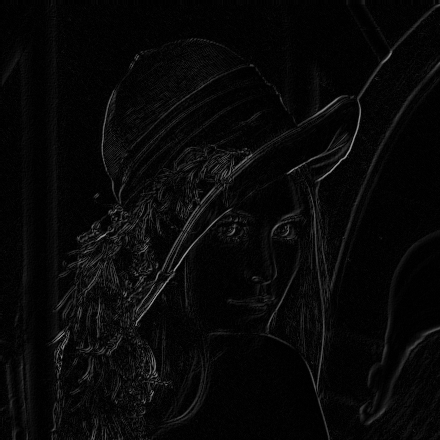

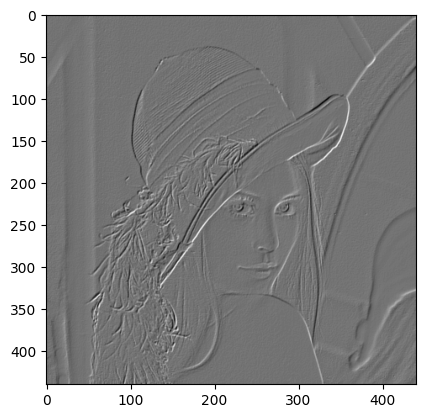

In [346]:
#wolf for robert my
conv_image_gray = conv2(gray_image, 'robert my', 'reflect')

result = Image.fromarray(cv2.convertScaleAbs(conv_image_gray).astype(np.uint8))
plt.imshow(conv_image_gray, cmap='gray')
result.save("lena_robert_my_gray.png")
result


(442, 442)


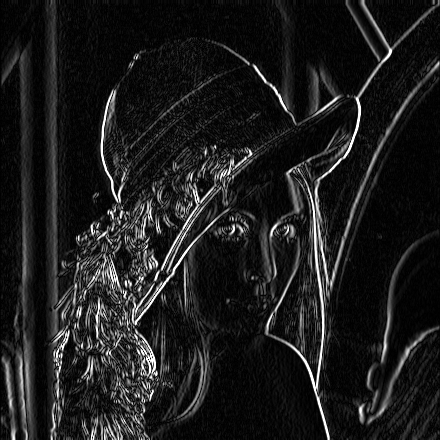

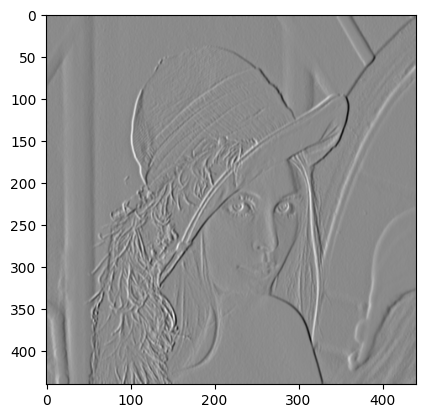

In [347]:
#wolf for prewitt mx
conv_image_gray = conv2(gray_image, 'prewitt mx', 'reflect')

result = Image.fromarray(cv2.convertScaleAbs(conv_image_gray).astype(np.uint8))
plt.imshow(conv_image_gray, cmap='gray')
result.save("lena_prewitt_mx_gray.png")
result

(442, 442)


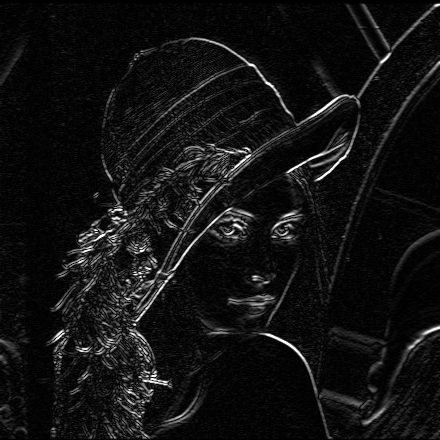

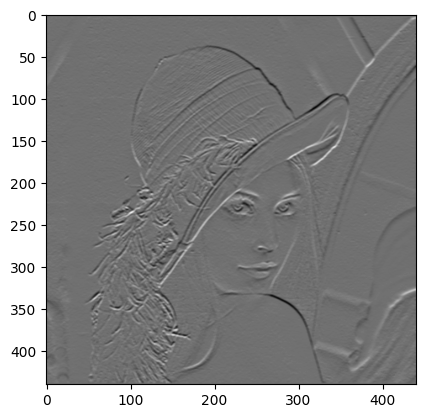

In [348]:
#wolf for prewitt my
conv_image_gray = conv2(gray_image, 'prewitt my', 'reflect')

result = Image.fromarray(cv2.convertScaleAbs(conv_image_gray).astype(np.uint8))
plt.imshow(conv_image_gray, cmap='gray')
result.save("lena_prewitt_my_gray.png")
result

(442, 442)


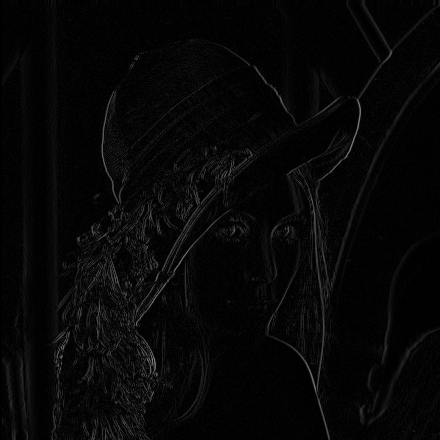

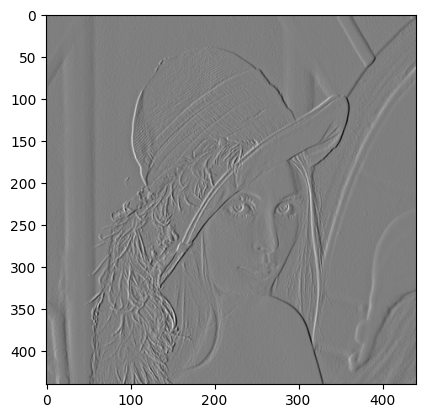

In [349]:
#wolf for first order derivative row
conv_image_gray = conv2(gray_image, 'first order derivative row', 'reflect')

result = Image.fromarray(cv2.convertScaleAbs(conv_image_gray).astype(np.uint8))
plt.imshow(conv_image_gray, cmap='gray')
result.save("lena_first_order_derivative_row_gray.png")
result

(442, 442)


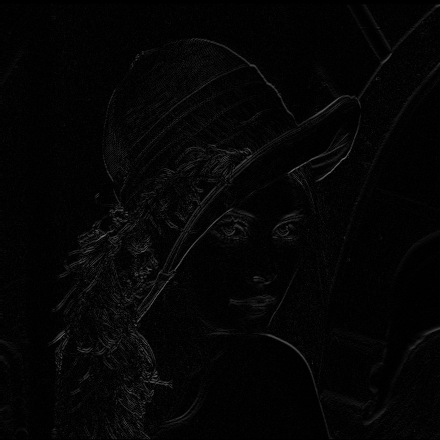

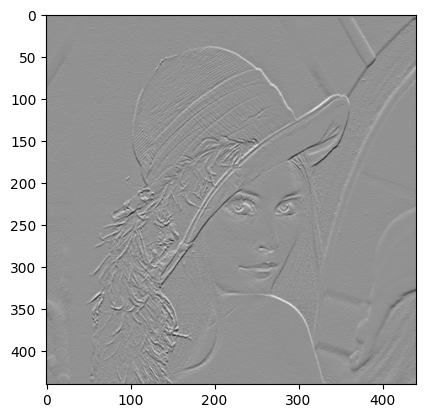

In [350]:
#wolf for first order derivative column
conv_image_gray = conv2(gray_image, 'first order derivative column', 'reflect')

result = Image.fromarray(cv2.convertScaleAbs(conv_image_gray).astype(np.uint8))
plt.imshow(conv_image_gray, cmap='gray')
result.save("lena_first_order_derivative_column_gray.png")
result

(442, 442)


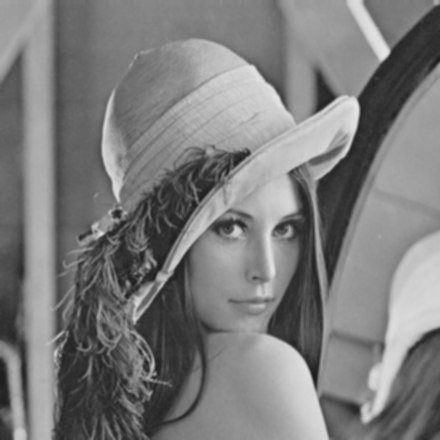

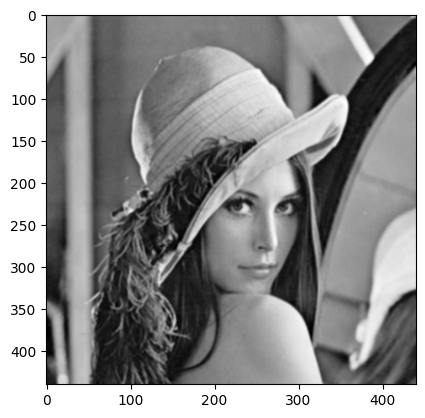

In [351]:
#wolf for box column
conv_image_gray = conv2(gray_image, 'box', 'reflect')

result = Image.fromarray(cv2.convertScaleAbs(conv_image_gray).astype(np.uint8))
plt.imshow(conv_image_gray, cmap='gray')
result.save("lena_box_gray.png")
result

Q1B

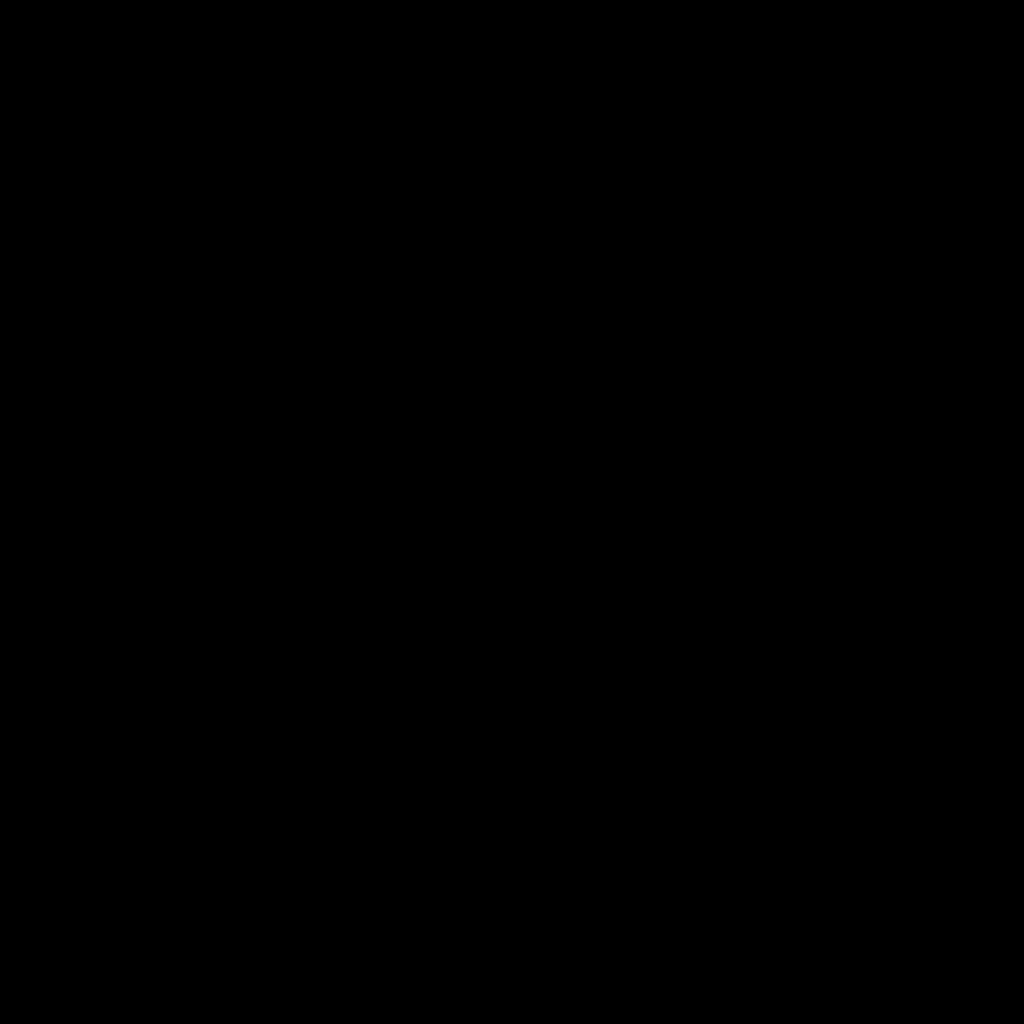

In [352]:
#1b
gray_impulse_image_np = np.zeros((1024, 1024))
gray_impulse_image_np[512][512] = 1

gray_impulse_image = Image.fromarray(gray_impulse_image_np.astype(np.uint8))

conv_image_impulse = conv2(gray_impulse_image, 'box', 'zero')

Image.fromarray(conv_image_impulse.astype(np.uint8))

In [353]:
for i in range(0, 1024):
    for j in range(0, 1024):
        if conv_image_impulse[i][j]>0:
            print(i, j, conv_image_impulse[i][j])      

511 511 0.1111111111111111
511 512 0.1111111111111111
511 513 0.1111111111111111
512 511 0.1111111111111111
512 512 0.1111111111111111
512 513 0.1111111111111111
513 511 0.1111111111111111
513 512 0.1111111111111111
513 513 0.1111111111111111


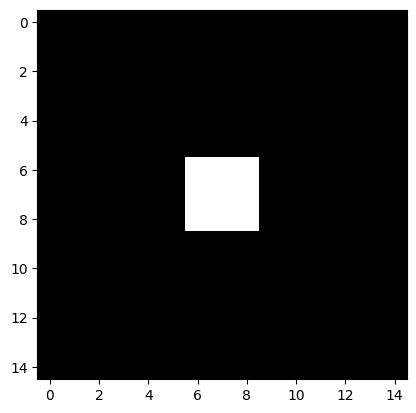

In [354]:
plt.imshow(conv_image_impulse[505:520,505:520], cmap='gray')